In [46]:
import pandas as pd
import matplotlib.pyplot as plt

In [47]:
df = pd.read_csv("datasets\income.csv")
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


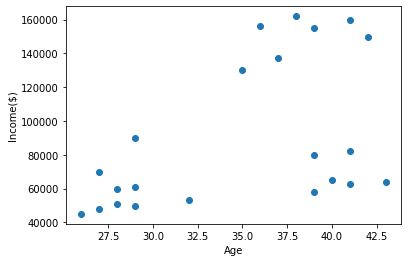

In [48]:
plt.xlabel('Age')
plt.ylabel('Income($)')
plt.scatter(df['Age'], df['Income($)'])

## Applying KMeans clustering algorithm

In [49]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3)

In [50]:
y_predicted = km.fit_predict(df[['Age','Income($)']])
y_predicted 

array([0, 0, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2])

In [51]:
df['cluster']=y_predicted
df.head()

,Name,Age,Income($),cluster
0,Rob,27,70000,0
1,Michael,29,90000,0
2,Mohan,29,61000,2
3,Ismail,28,60000,2
4,Kory,42,150000,1


## Finding Centroid

In [52]:
km.cluster_centers_

array([[3.40000000e+01, 8.05000000e+04],
       [3.82857143e+01, 1.50000000e+05],
       [3.29090909e+01, 5.61363636e+04]])

## plotting scatter graph

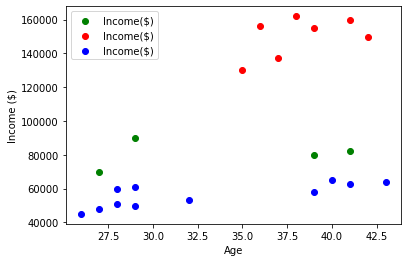

In [53]:
df0 = df[df.cluster==0]
df1 = df[df.cluster==1]
df2 = df[df.cluster==2]

plt.scatter(df0.Age,df0['Income($)'],color='green', label="Income($)")
plt.scatter(df1.Age,df1['Income($)'],color='red', label="Income($)")
plt.scatter(df2.Age,df2['Income($)'],color='blue', label="Income($)")

plt.xlabel('Age')
plt.ylabel('Income ($)')
plt.legend()

## Preprocessing using min max scaler

In [54]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [55]:
scaler.fit(df[['Income($)']])
df['Income($)'] = scaler.transform(df[['Income($)']])

scaler.fit(df[['Age']])
df['Age'] = scaler.transform(df[['Age']])

In [56]:
df.head()

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,0
1,Michael,0.176471,0.384615,0
2,Mohan,0.176471,0.136752,2
3,Ismail,0.117647,0.128205,2
4,Kory,0.941176,0.897436,1


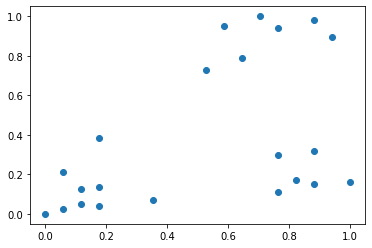

In [57]:
plt.scatter(df['Age'], df['Income($)'])

## Applying KMeans algorithm again on preprocessed data

In [58]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[['Age','Income($)']])
df['cluster']=y_predicted
df.head()

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,0
1,Michael,0.176471,0.384615,0
2,Mohan,0.176471,0.136752,0
3,Ismail,0.117647,0.128205,0
4,Kory,0.941176,0.897436,1


In [59]:
km.cluster_centers_

array([[0.1372549 , 0.11633428],
       [0.72268908, 0.8974359 ],
       [0.85294118, 0.2022792 ]])

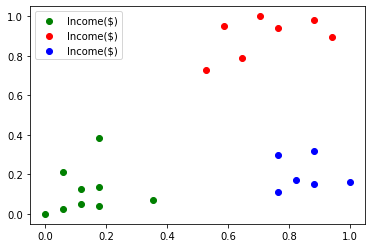

In [60]:
df0 = df[df.cluster==0]
df1 = df[df.cluster==1]
df2 = df[df.cluster==2]

plt.scatter(df0.Age,df0['Income($)'],color='green', label="Income($)")
plt.scatter(df1.Age,df1['Income($)'],color='red', label="Income($)")
plt.scatter(df2.Age,df2['Income($)'],color='blue', label="Income($)")
plt.legend()

cluster looks ok here

## ploting scatter again with centroid

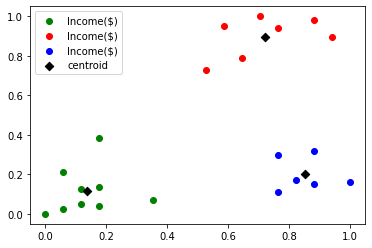

In [61]:
df0 = df[df.cluster==0]
df1 = df[df.cluster==1]
df2 = df[df.cluster==2]

plt.scatter(df0.Age,df0['Income($)'],color='green', label="Income($)")
plt.scatter(df1.Age,df1['Income($)'],color='red', label="Income($)")
plt.scatter(df2.Age,df2['Income($)'],color='blue', label="Income($)")

plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='black',marker='D',label='centroid')
plt.legend()